### UK employment by industry from 1381 to 2016 from Bank of England macr-economic data
## Import libraries

In [1]:
#Imports
#import relevant packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

##Import data

In [2]:
DF = pd.read_csv('ukconsumerdata.csv')
DF.head(20)

,Title,Households (S.14): Individual consumption expenditure (P.31) Uses: Current price: £m: SA,Household final consumption expenditure :National concept CVM SA - £m,Household final consumption expenditure: National concept IDEF SA 2019=100,Households (S.14): Individual consumption expenditure (P.31) Uses: Current price: £m: NSA,Household final consumption expenditure :National concept CVM NAYear NSA £m,Household final consumption expenditure: Domestic concept CP NSA £m,Household final consumption expenditure: Domestic concept CVM NAYear NSA £m,Household final consumption expenditure: National concept IDEF NSA 2019=100,Household final consumption expenditure: UK tourist expenditure abroad CP NSA £m,...,04.5.5 Heat energy CP SA £m,04.5.5 Heat energy CVM NAYear SA £m,01 Food and non-alcoholic beverages CP SA £m,01 Food and non-alcoholic beverages CVM NAYear SA £m,02.2 Tobacco CP SA £m,02.2 Tobacco CVM NAYear SA £m,04.5 Electricity; gas and other fuels CP SA £m,04.5 Electricity; gas and other fuels CVM NAYear SA £m,10 Education CP SA £m,10 Education CVM NAYear SA £m
0,CDID,ABJQ,ABJR,ABJS,ABPB,ABPF,ABQI,ABQJ,ABQU,ABTA,...,ZWIU,ZWIV,ZWUM,ZWUN,ZWUO,ZWUP,ZWUQ,ZWUR,ZWUS,ZWUT
1,PreUnit,£,£,NaN,£,£,NaN,NaN,NaN,NaN,...,NaN,NaN,£,£,NaN,NaN,NaN,NaN,£,£
2,Unit,m,m,"Index, base year = 100",m,m,NaN,NaN,"Index, base year = 100",NaN,...,NaN,NaN,m,m,NaN,NaN,NaN,NaN,m,m
3,Release Date,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,...,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023
4,Next release,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,...,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23
5,Important Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1948,8426,229143,NaN,8426,229143,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1949,8798,233171,NaN,8798,233171,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1950,9299,239721,NaN,9299,239721,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1951,10053,236818,NaN,10053,236818,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
DF=DF.iloc[0:81, :]
DF.head()

,Title,Households (S.14): Individual consumption expenditure (P.31) Uses: Current price: £m: SA,Household final consumption expenditure :National concept CVM SA - £m,Household final consumption expenditure: National concept IDEF SA 2019=100,Households (S.14): Individual consumption expenditure (P.31) Uses: Current price: £m: NSA,Household final consumption expenditure :National concept CVM NAYear NSA £m,Household final consumption expenditure: Domestic concept CP NSA £m,Household final consumption expenditure: Domestic concept CVM NAYear NSA £m,Household final consumption expenditure: National concept IDEF NSA 2019=100,Household final consumption expenditure: UK tourist expenditure abroad CP NSA £m,...,04.5.5 Heat energy CP SA £m,04.5.5 Heat energy CVM NAYear SA £m,01 Food and non-alcoholic beverages CP SA £m,01 Food and non-alcoholic beverages CVM NAYear SA £m,02.2 Tobacco CP SA £m,02.2 Tobacco CVM NAYear SA £m,04.5 Electricity; gas and other fuels CP SA £m,04.5 Electricity; gas and other fuels CVM NAYear SA £m,10 Education CP SA £m,10 Education CVM NAYear SA £m
0,CDID,ABJQ,ABJR,ABJS,ABPB,ABPF,ABQI,ABQJ,ABQU,ABTA,...,ZWIU,ZWIV,ZWUM,ZWUN,ZWUO,ZWUP,ZWUQ,ZWUR,ZWUS,ZWUT
1,PreUnit,£,£,NaN,£,£,NaN,NaN,NaN,NaN,...,NaN,NaN,£,£,NaN,NaN,NaN,NaN,£,£
2,Unit,m,m,"Index, base year = 100",m,m,NaN,NaN,"Index, base year = 100",NaN,...,NaN,NaN,m,m,NaN,NaN,NaN,NaN,m,m
3,Release Date,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,...,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023
4,Next release,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,...,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23


In [4]:
DF.tail()

,Title,Households (S.14): Individual consumption expenditure (P.31) Uses: Current price: £m: SA,Household final consumption expenditure :National concept CVM SA - £m,Household final consumption expenditure: National concept IDEF SA 2019=100,Households (S.14): Individual consumption expenditure (P.31) Uses: Current price: £m: NSA,Household final consumption expenditure :National concept CVM NAYear NSA £m,Household final consumption expenditure: Domestic concept CP NSA £m,Household final consumption expenditure: Domestic concept CVM NAYear NSA £m,Household final consumption expenditure: National concept IDEF NSA 2019=100,Household final consumption expenditure: UK tourist expenditure abroad CP NSA £m,...,04.5.5 Heat energy CP SA £m,04.5.5 Heat energy CVM NAYear SA £m,01 Food and non-alcoholic beverages CP SA £m,01 Food and non-alcoholic beverages CVM NAYear SA £m,02.2 Tobacco CP SA £m,02.2 Tobacco CVM NAYear SA £m,04.5 Electricity; gas and other fuels CP SA £m,04.5 Electricity; gas and other fuels CVM NAYear SA £m,10 Education CP SA £m,10 Education CVM NAYear SA £m
76,2018,1352042,1374051,98.4,1352042,1374051,1329978,1349324,98.4,63161,...,0,0,106930,108685,20917,22024,33558,34615,28994,29768
77,2019,1387664,1387664,100,1387664,1387664,1363381,1363381,100,68689,...,0,0,110325,110325,21285,21285,32299,32299,29663,29663
78,2020,1214474,1208053,100.5,1214474,1208053,1208423,1202112,100.5,24282,...,0,0,120091,119208,23269,22495,31669,33056,30609,28196
79,2021,1326320,1283950,103.3,1326320,1283950,1319412,1276833,103.3,27704,...,0,0,122642,120662,24248,22340,33929,33837,33223,31451
80,2022,1514515,1351727,112,1514515,1351727,1490922,1333752,112,68986,...,0,0,126737,112384,25134,21339,47740,29557,35339,32128


In [5]:
columns=['Title', '01.1 Food CP NSA £m', '02.1 Alcoholic beverages (off trade) CP NSA £m', '02.2 Tobacco CP NSA £m', '03 Clothing and footwear CP NSA £m', '04 Housing; water; electricity; gas and other fuels CP NSA £m', '05 Furnishings; household equipment and routine maintenance of the house CP NSA £m', '06 Health CP NSA £m', '07 Transport CP NSA £m', '08 Communication CP NSA £m', '09 Recreation and culture CP NSA £m', '10 Education CP NSA £m', '11 Restaurants and hotels CP NSA £m', '12 Miscellaneous goods and services CP NSA £m']
DFcore = DF[columns]
DFcore.head(10)

,Title,01.1 Food CP NSA £m,02.1 Alcoholic beverages (off trade) CP NSA £m,02.2 Tobacco CP NSA £m,03 Clothing and footwear CP NSA £m,04 Housing; water; electricity; gas and other fuels CP NSA £m,05 Furnishings; household equipment and routine maintenance of the house CP NSA £m,06 Health CP NSA £m,07 Transport CP NSA £m,08 Communication CP NSA £m,09 Recreation and culture CP NSA £m,10 Education CP NSA £m,11 Restaurants and hotels CP NSA £m,12 Miscellaneous goods and services CP NSA £m
0,CDID,ABZW,ADFM,ADFN,ADFP,ADFS,ADFY,ADGP,ADGT,ADGX,ADGY,ADIE,ADIF,ADII
1,PreUnit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Release Date,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023,31/03/2023
4,Next release,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23,30-Jun-23
5,Important Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
DFcore = DFcore.iloc[6:81,:].reset_index()
DFcore.head()

,index,Title,01.1 Food CP NSA £m,02.1 Alcoholic beverages (off trade) CP NSA £m,02.2 Tobacco CP NSA £m,03 Clothing and footwear CP NSA £m,04 Housing; water; electricity; gas and other fuels CP NSA £m,05 Furnishings; household equipment and routine maintenance of the house CP NSA £m,06 Health CP NSA £m,07 Transport CP NSA £m,08 Communication CP NSA £m,09 Recreation and culture CP NSA £m,10 Education CP NSA £m,11 Restaurants and hotels CP NSA £m,12 Miscellaneous goods and services CP NSA £m
0,6,1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
DFcore.tail()

,index,Title,01.1 Food CP NSA £m,02.1 Alcoholic beverages (off trade) CP NSA £m,02.2 Tobacco CP NSA £m,03 Clothing and footwear CP NSA £m,04 Housing; water; electricity; gas and other fuels CP NSA £m,05 Furnishings; household equipment and routine maintenance of the house CP NSA £m,06 Health CP NSA £m,07 Transport CP NSA £m,08 Communication CP NSA £m,09 Recreation and culture CP NSA £m,10 Education CP NSA £m,11 Restaurants and hotels CP NSA £m,12 Miscellaneous goods and services CP NSA £m
70,76,2018,96558,21488,20917,67183,346794,64778,28240,188887,28273,125589,28994,139390,158442
71,77,2019,99364,22062,21285,69852,352210,66813,28609,193279,27957,132386,29663,143174,162142
72,78,2020,108272,26847,23269,55678,357711,68759,24308,126961,28552,114408,30609,87185,141333
73,79,2021,110118,25514,24248,64732,367526,73441,25494,150366,28335,131075,33223,119901,150240
74,80,2022,113648,23292,25134,73650,393590,76852,27339,193371,28403,144524,35339,166206,173824


Turns out data only starts at 1985


In [8]:
DFcore[DFcore['Title'] =='1985']

,index,Title,01.1 Food CP NSA £m,02.1 Alcoholic beverages (off trade) CP NSA £m,02.2 Tobacco CP NSA £m,03 Clothing and footwear CP NSA £m,04 Housing; water; electricity; gas and other fuels CP NSA £m,05 Furnishings; household equipment and routine maintenance of the house CP NSA £m,06 Health CP NSA £m,07 Transport CP NSA £m,08 Communication CP NSA £m,09 Recreation and culture CP NSA £m,10 Education CP NSA £m,11 Restaurants and hotels CP NSA £m,12 Miscellaneous goods and services CP NSA £m
37,43,1985,27692,4486,6732,14790,71471,14539,3089,31632,4672,20017,1269,22740,21623


In [9]:
DFcore=DFcore.iloc[37:75, :]
DFcore.head()

,index,Title,01.1 Food CP NSA £m,02.1 Alcoholic beverages (off trade) CP NSA £m,02.2 Tobacco CP NSA £m,03 Clothing and footwear CP NSA £m,04 Housing; water; electricity; gas and other fuels CP NSA £m,05 Furnishings; household equipment and routine maintenance of the house CP NSA £m,06 Health CP NSA £m,07 Transport CP NSA £m,08 Communication CP NSA £m,09 Recreation and culture CP NSA £m,10 Education CP NSA £m,11 Restaurants and hotels CP NSA £m,12 Miscellaneous goods and services CP NSA £m
37,43,1985,27692,4486,6732,14790,71471,14539,3089,31632,4672,20017,1269,22740,21623
38,44,1986,29421,4727,7185,16364,76834,16202,3471,34612,5350,22198,1396,25053,25968
39,45,1987,30963,5057,7291,17476,82358,17879,4018,38974,5917,25145,1543,27170,30710
40,46,1988,32763,5435,7515,18513,89073,20276,4549,45332,6604,28683,1732,33608,36081
41,47,1989,35164,5746,7744,19181,96609,21108,5244,50260,7285,32251,2090,37689,40944


In [10]:
DFcore.reset_index(inplace=True)
DFcore.head()

,level_0,index,Title,01.1 Food CP NSA £m,02.1 Alcoholic beverages (off trade) CP NSA £m,02.2 Tobacco CP NSA £m,03 Clothing and footwear CP NSA £m,04 Housing; water; electricity; gas and other fuels CP NSA £m,05 Furnishings; household equipment and routine maintenance of the house CP NSA £m,06 Health CP NSA £m,07 Transport CP NSA £m,08 Communication CP NSA £m,09 Recreation and culture CP NSA £m,10 Education CP NSA £m,11 Restaurants and hotels CP NSA £m,12 Miscellaneous goods and services CP NSA £m
0,37,43,1985,27692,4486,6732,14790,71471,14539,3089,31632,4672,20017,1269,22740,21623
1,38,44,1986,29421,4727,7185,16364,76834,16202,3471,34612,5350,22198,1396,25053,25968
2,39,45,1987,30963,5057,7291,17476,82358,17879,4018,38974,5917,25145,1543,27170,30710
3,40,46,1988,32763,5435,7515,18513,89073,20276,4549,45332,6604,28683,1732,33608,36081
4,41,47,1989,35164,5746,7744,19181,96609,21108,5244,50260,7285,32251,2090,37689,40944


In [11]:
DFcore.drop(['level_0', 'index'], axis=1, inplace=True)
DFcore.head()

,Title,01.1 Food CP NSA £m,02.1 Alcoholic beverages (off trade) CP NSA £m,02.2 Tobacco CP NSA £m,03 Clothing and footwear CP NSA £m,04 Housing; water; electricity; gas and other fuels CP NSA £m,05 Furnishings; household equipment and routine maintenance of the house CP NSA £m,06 Health CP NSA £m,07 Transport CP NSA £m,08 Communication CP NSA £m,09 Recreation and culture CP NSA £m,10 Education CP NSA £m,11 Restaurants and hotels CP NSA £m,12 Miscellaneous goods and services CP NSA £m
0,1985,27692,4486,6732,14790,71471,14539,3089,31632,4672,20017,1269,22740,21623
1,1986,29421,4727,7185,16364,76834,16202,3471,34612,5350,22198,1396,25053,25968
2,1987,30963,5057,7291,17476,82358,17879,4018,38974,5917,25145,1543,27170,30710
3,1988,32763,5435,7515,18513,89073,20276,4549,45332,6604,28683,1732,33608,36081
4,1989,35164,5746,7744,19181,96609,21108,5244,50260,7285,32251,2090,37689,40944


In [12]:
DFcore.rename(columns = {'Title':'Year', 
                         '01.1 Food CP NSA £m':'Food', 
                         '02.1 Alcoholic beverages (off trade) CP NSA £m': 'Alcohol', 
                         '02.2 Tobacco CP NSA £m': 'Tobacco', 
                         '03 Clothing and footwear CP NSA £m': 'Clothing and footwear', 
                         '04 Housing; water; electricity; gas and other fuels CP NSA £m': 'Housing and utilities', 
                         '05 Furnishings; household equipment and routine maintenance of the house CP NSA £m': 'Household furnishing, equip and maintenance', 
                         '06 Health CP NSA £m': 'Health', 
                         '07 Transport CP NSA £m': 'Transport', 
                         '08 Communication CP NSA £m': 'Communication', 
                         '09 Recreation and culture CP NSA £m': 'Recreation and culture', 
                         '10 Education CP NSA £m': 'Education', 
                         '11 Restaurants and hotels CP NSA £m': 'Restaurants and hotels', 
                         '12 Miscellaneous goods and services CP NSA £m': 'Miscellaneous'}, inplace = True)
DFcore.head()

,Year,Food,Alcohol,Tobacco,Clothing and footwear,Housing and utilities,"Household furnishing, equip and maintenance",Health,Transport,Communication,Recreation and culture,Education,Restaurants and hotels,Miscellaneous
0,1985,27692,4486,6732,14790,71471,14539,3089,31632,4672,20017,1269,22740,21623
1,1986,29421,4727,7185,16364,76834,16202,3471,34612,5350,22198,1396,25053,25968
2,1987,30963,5057,7291,17476,82358,17879,4018,38974,5917,25145,1543,27170,30710
3,1988,32763,5435,7515,18513,89073,20276,4549,45332,6604,28683,1732,33608,36081
4,1989,35164,5746,7744,19181,96609,21108,5244,50260,7285,32251,2090,37689,40944


In [13]:
DFcore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Year                                         38 non-null     object
 1   Food                                         38 non-null     object
 2   Alcohol                                      38 non-null     object
 3   Tobacco                                      38 non-null     object
 4   Clothing and footwear                        38 non-null     object
 5   Housing and utilities                        38 non-null     object
 6   Household furnishing, equip and maintenance  38 non-null     object
 7   Health                                       38 non-null     object
 8   Transport                                    38 non-null     object
 9   Communication                                38 non-null     object
 10  Recreation and c

In [14]:
DFcore=DFcore.astype(int)
DFcore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Year                                         38 non-null     int32
 1   Food                                         38 non-null     int32
 2   Alcohol                                      38 non-null     int32
 3   Tobacco                                      38 non-null     int32
 4   Clothing and footwear                        38 non-null     int32
 5   Housing and utilities                        38 non-null     int32
 6   Household furnishing, equip and maintenance  38 non-null     int32
 7   Health                                       38 non-null     int32
 8   Transport                                    38 non-null     int32
 9   Communication                                38 non-null     int32
 10  Recreation and culture      

<AxesSubplot:>

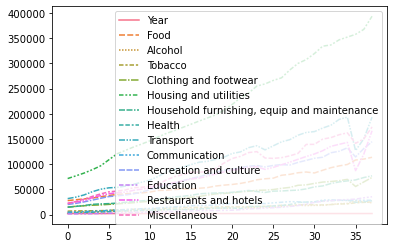

In [15]:
sns.lineplot(data=DFcore)

In [16]:
DFcoreM = DFcore.melt('Year', var_name='cols', value_name='vals')
DFcoreM.head()


,Year,cols,vals
0,1985,Food,27692
1,1986,Food,29421
2,1987,Food,30963
3,1988,Food,32763
4,1989,Food,35164


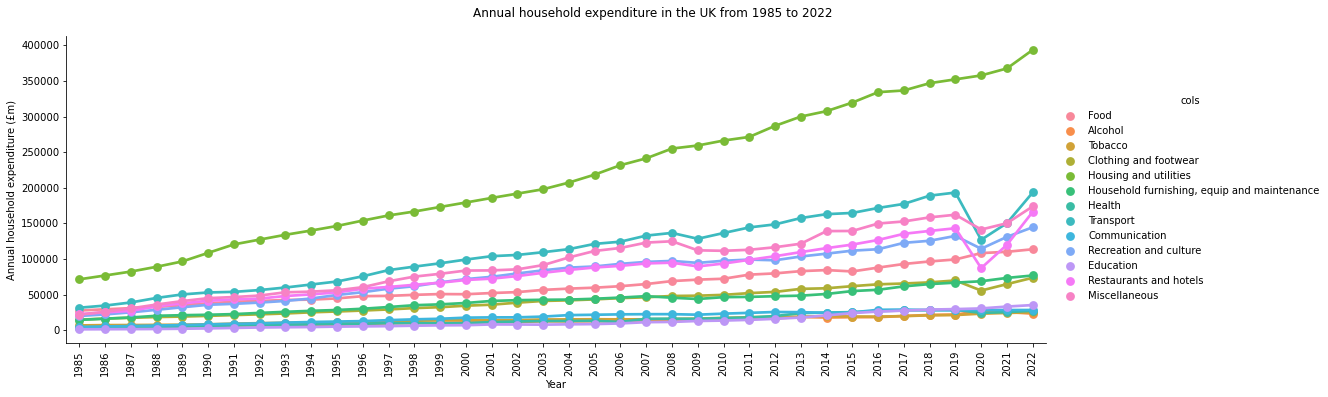

In [17]:
sns.set_palette(sns.color_palette("flare"))
g = sns.catplot(x="Year", y="vals", hue='cols', data=DFcoreM, kind='point', height=5, aspect=3)
g.set_xticklabels(rotation=90)
g.set_axis_labels("Year", "Annual household expenditure (£m)")
g.fig.suptitle('Annual household expenditure in the UK from 1985 to 2022', y=1.05)
g.fig.savefig('AnnExp1985-2022 - lineplot')

Text(0.5, 1.05, 'Annual household expenditure in the UK from 1985 to 2022')

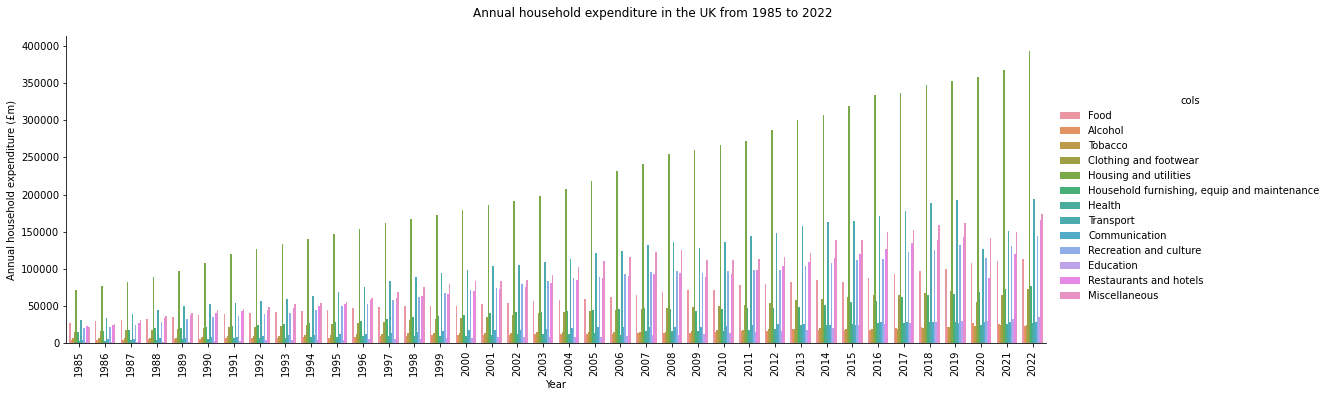

In [18]:
sns.set_palette(sns.color_palette("flare"))
g = sns.catplot(x="Year", y="vals", hue='cols', data=DFcoreM, kind='bar', height=5, aspect=3)
g.set_xticklabels(rotation=90)
g.set_axis_labels("Year", "Annual household expenditure (£m)")
g.fig.suptitle('Annual household expenditure in the UK from 1985 to 2022', y=1.05)

In [19]:
DFCorePand = DFcore.iloc[34:39, :]
DFCorePand.head()

,Year,Food,Alcohol,Tobacco,Clothing and footwear,Housing and utilities,"Household furnishing, equip and maintenance",Health,Transport,Communication,Recreation and culture,Education,Restaurants and hotels,Miscellaneous
34,2019,99364,22062,21285,69852,352210,66813,28609,193279,27957,132386,29663,143174,162142
35,2020,108272,26847,23269,55678,357711,68759,24308,126961,28552,114408,30609,87185,141333
36,2021,110118,25514,24248,64732,367526,73441,25494,150366,28335,131075,33223,119901,150240
37,2022,113648,23292,25134,73650,393590,76852,27339,193371,28403,144524,35339,166206,173824


In [20]:
DFCorePandM = DFCorePand.melt('Year', var_name='cols', value_name='vals')
DFCorePandM.head()

,Year,cols,vals
0,2019,Food,99364
1,2020,Food,108272
2,2021,Food,110118
3,2022,Food,113648
4,2019,Alcohol,22062


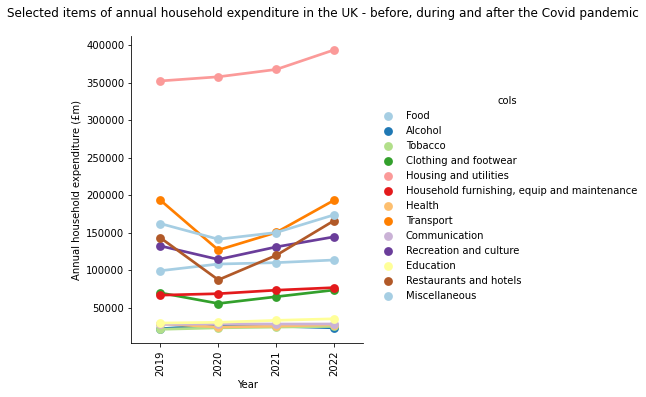

In [21]:
g = sns.catplot(x="Year", y="vals", hue='cols', data=DFCorePandM, kind='point', height=5, aspect=1, palette=sns.color_palette("Paired"))
g.set_xticklabels(rotation=90)
g.set_axis_labels("Year", "Annual household expenditure (£m)")
g.fig.suptitle('Selected items of annual household expenditure in the UK - before, during and after the Covid pandemic', y=1.05)


g.fig.savefig('SelectedExpPandemic - lineplot')

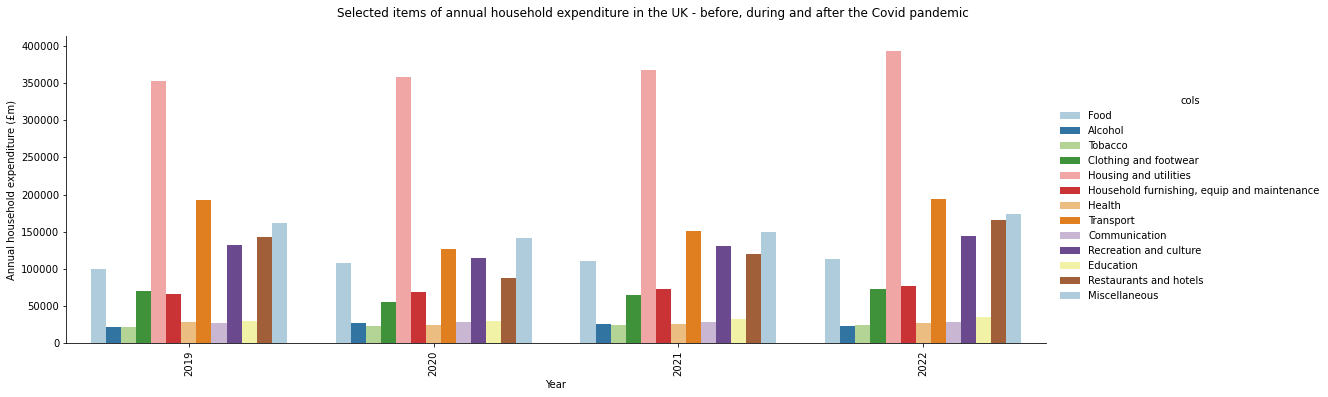

In [22]:
g = sns.catplot(x="Year", y="vals", hue='cols', data=DFCorePandM, kind='bar', height=5, aspect=3, palette=sns.color_palette("Paired"))
g.set_xticklabels(rotation=90)
g.set_axis_labels("Year", "Annual household expenditure (£m)")
g.fig.suptitle('Selected items of annual household expenditure in the UK - before, during and after the Covid pandemic', y=1.05)
g.fig.savefig('SelectedExpPandemic - groupedBarplot')

In [23]:
pop = pd.read_excel('ukpop1985-2022.xlsx')
pop.head()

,Year,Uk population
0,1985,56554.003
1,1986,56683.834
2,1987,56804.004
3,1988,56916.408
4,1989,57076.416


In [24]:
pop.drop(['Year'], axis=1, inplace=True)
pop.head()

,Uk population
0,56554.003
1,56683.834
2,56804.004
3,56916.408
4,57076.416


In [25]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Uk population  38 non-null     float64
dtypes: float64(1)
memory usage: 432.0 bytes


In [26]:
pop['Uk population'] = pop['Uk population'].round()
pop.head()

,Uk population
0,56554.0
1,56684.0
2,56804.0
3,56916.0
4,57076.0


In [27]:
DFcorePop = pd.concat([DFcore, pop], axis=1)
DFcorePop.head()

,Year,Food,Alcohol,Tobacco,Clothing and footwear,Housing and utilities,"Household furnishing, equip and maintenance",Health,Transport,Communication,Recreation and culture,Education,Restaurants and hotels,Miscellaneous,Uk population
0,1985,27692,4486,6732,14790,71471,14539,3089,31632,4672,20017,1269,22740,21623,56554.0
1,1986,29421,4727,7185,16364,76834,16202,3471,34612,5350,22198,1396,25053,25968,56684.0
2,1987,30963,5057,7291,17476,82358,17879,4018,38974,5917,25145,1543,27170,30710,56804.0
3,1988,32763,5435,7515,18513,89073,20276,4549,45332,6604,28683,1732,33608,36081,56916.0
4,1989,35164,5746,7744,19181,96609,21108,5244,50260,7285,32251,2090,37689,40944,57076.0


In [28]:
DFcorePop.drop(['Miscellaneous'], axis=1, inplace=True)
DFcorePop.head()

,Year,Food,Alcohol,Tobacco,Clothing and footwear,Housing and utilities,"Household furnishing, equip and maintenance",Health,Transport,Communication,Recreation and culture,Education,Restaurants and hotels,Uk population
0,1985,27692,4486,6732,14790,71471,14539,3089,31632,4672,20017,1269,22740,56554.0
1,1986,29421,4727,7185,16364,76834,16202,3471,34612,5350,22198,1396,25053,56684.0
2,1987,30963,5057,7291,17476,82358,17879,4018,38974,5917,25145,1543,27170,56804.0
3,1988,32763,5435,7515,18513,89073,20276,4549,45332,6604,28683,1732,33608,56916.0
4,1989,35164,5746,7744,19181,96609,21108,5244,50260,7285,32251,2090,37689,57076.0


In [29]:
DFcorePop['Food per Cap'] = (DFcorePop['Food']*1000)/(DFcorePop['Uk population'])
DFcorePop['Alcohol per Cap'] = (DFcorePop['Alcohol']*1000)/(DFcorePop['Uk population'])
DFcorePop['Tobacco per Cap'] = (DFcorePop['Tobacco']*1000)/(DFcorePop['Uk population'])
DFcorePop['Clothing/footwear per Cap'] = (DFcorePop['Clothing and footwear']*1000)/(DFcorePop['Uk population'])
DFcorePop['Transport per Cap'] = (DFcorePop['Transport']*1000)/(DFcorePop['Uk population'])
DFcorePop['Recreation and culture per Cap'] = (DFcorePop['Recreation and culture']*1000)/(DFcorePop['Uk population'])
DFcorePop['Restaurants/hotels per Cap'] = (DFcorePop['Restaurants and hotels']*1000)/(DFcorePop['Uk population'])
DFcorePop.head()

,Year,Food,Alcohol,Tobacco,Clothing and footwear,Housing and utilities,"Household furnishing, equip and maintenance",Health,Transport,Communication,...,Education,Restaurants and hotels,Uk population,Food per Cap,Alcohol per Cap,Tobacco per Cap,Clothing/footwear per Cap,Transport per Cap,Recreation and culture per Cap,Restaurants/hotels per Cap
0,1985,27692,4486,6732,14790,71471,14539,3089,31632,4672,...,1269,22740,56554.0,489.655904,79.322418,119.036673,261.519963,559.323832,353.944902,402.093574
1,1986,29421,4727,7185,16364,76834,16202,3471,34612,5350,...,1396,25053,56684.0,519.035354,83.392139,126.755345,288.688166,610.613224,391.609625,441.976572
2,1987,30963,5057,7291,17476,82358,17879,4018,38974,5917,...,1543,27170,56804.0,545.084853,89.025421,128.353637,307.654391,686.113654,442.662489,478.311387
3,1988,32763,5435,7515,18513,89073,20276,4549,45332,6604,...,1732,33608,56916.0,575.637782,95.491602,132.036686,325.268817,796.471994,503.953194,590.484222
4,1989,35164,5746,7744,19181,96609,21108,5244,50260,7285,...,2090,37689,57076.0,616.090826,100.672787,135.678744,336.060691,880.580279,565.053613,660.330086


In [30]:
DFcorePopSelect=DFcorePop[['Year', 'Food per Cap', 'Alcohol per Cap', 'Tobacco per Cap', 'Clothing/footwear per Cap', 'Transport per Cap', 'Recreation and culture per Cap', 'Restaurants/hotels per Cap']]
DFcorePopSelect.head()

,Year,Food per Cap,Alcohol per Cap,Tobacco per Cap,Clothing/footwear per Cap,Transport per Cap,Recreation and culture per Cap,Restaurants/hotels per Cap
0,1985,489.655904,79.322418,119.036673,261.519963,559.323832,353.944902,402.093574
1,1986,519.035354,83.392139,126.755345,288.688166,610.613224,391.609625,441.976572
2,1987,545.084853,89.025421,128.353637,307.654391,686.113654,442.662489,478.311387
3,1988,575.637782,95.491602,132.036686,325.268817,796.471994,503.953194,590.484222
4,1989,616.090826,100.672787,135.678744,336.060691,880.580279,565.053613,660.330086


In [31]:
DFcorePopSelect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            38 non-null     int32  
 1   Food per Cap                    38 non-null     float64
 2   Alcohol per Cap                 38 non-null     float64
 3   Tobacco per Cap                 38 non-null     float64
 4   Clothing/footwear per Cap       38 non-null     float64
 5   Transport per Cap               38 non-null     float64
 6   Recreation and culture per Cap  38 non-null     float64
 7   Restaurants/hotels per Cap      38 non-null     float64
dtypes: float64(7), int32(1)
memory usage: 2.4 KB


In [32]:
DFcorePopSelectPand = DFcorePopSelect.iloc[34:39, :]
DFcorePopSelectPand.head()

,Year,Food per Cap,Alcohol per Cap,Tobacco per Cap,Clothing/footwear per Cap,Transport per Cap,Recreation and culture per Cap,Restaurants/hotels per Cap
34,2019,1487.952800,330.373321,318.737927,1046.017461,2894.308091,1982.449572,2143.997364
35,2020,1614.578207,400.348946,346.992947,830.283780,1893.273088,1706.079721,1300.123772
36,2021,1636.687921,379.215529,360.398924,962.114118,2234.895439,1948.172590,1782.093013
37,2022,1677.783191,343.859338,371.052748,1087.293503,2854.732273,2133.604972,2453.695912


In [33]:
DFcorePopSelectPandM = DFcorePopSelectPand.melt('Year', var_name='cols', value_name='vals')
DFcorePopSelectPandM.head()

,Year,cols,vals
0,2019,Food per Cap,1487.952800
1,2020,Food per Cap,1614.578207
2,2021,Food per Cap,1636.687921
3,2022,Food per Cap,1677.783191
4,2019,Alcohol per Cap,330.373321


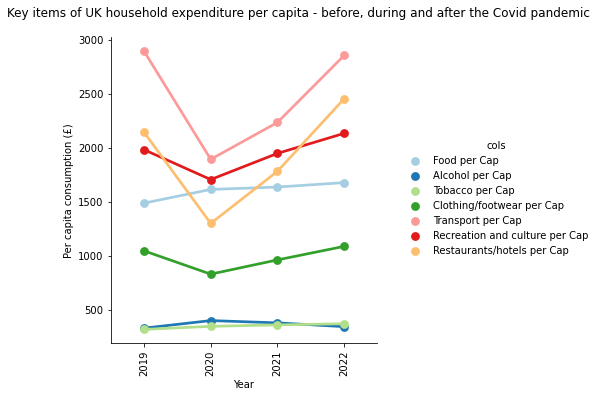

In [34]:
g = sns.catplot(x="Year", y="vals", hue='cols', data=DFcorePopSelectPandM, kind='point', height=5, aspect=1, palette=sns.color_palette("Paired"))
g.set_xticklabels(rotation=90)
g.set_axis_labels("Year", "Per capita consumption (£)")
g.fig.suptitle('Key items of UK household expenditure per capita - before, during and after the Covid pandemic', y=1.05)
g.fig.savefig('SelectedExpPandemicperCap - lineplot')

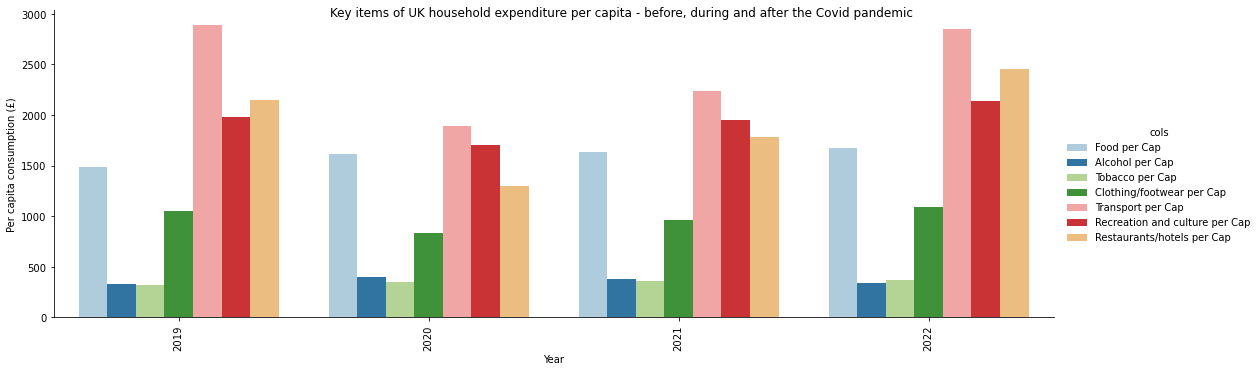

In [35]:
g = sns.catplot(x="Year", y="vals", hue='cols', data=DFcorePopSelectPandM, kind='bar', height=5, aspect=3, palette=sns.color_palette("Paired"))
g.set_xticklabels(rotation=90)
g.set_axis_labels("Year", "Per capita consumption (£)")
g.fig.suptitle('Key items of UK household expenditure per capita - before, during and after the Covid pandemic', fontdict={'size': 30, 'weight': 'bold'})
g.fig.savefig('SelectedExpPandemicperCap - groupedBarplot')
